In [101]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<h4>Load dữ liệu</h4>

In [102]:
df = pd.read_csv('train.csv')

<h4>Tạo thêm 2 cột Month và Year(Tháng và Năm đặt hàng)</h4>

In [103]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016


<h4>Sắp xếp lại dữ liệu có tuần tự theo thời gian</h4>

In [104]:
df = df.sort_values(by='Order Date')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
7980,7981,CA-2015-103800,2015-01-03,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,1,2015
741,742,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,1,2015
740,741,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,1,2015
739,740,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,1,2015
1759,1760,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,1,2015


<h4>Chỉ chọn ra các cột Month, Year và Sales</h4>

In [105]:
df = df[['Order Date','Month', 'Year','Sales']]
df.head(5)

,Order Date,Month,Year,Sales
7980,2015-01-03,1,2015,16.448
741,2015-01-04,1,2015,3.540
740,2015-01-04,1,2015,272.736
739,2015-01-04,1,2015,11.784
1759,2015-01-05,1,2015,19.536


<h4>Tổng hợp sales trong cùng 1 tháng trong năm</h4>

In [106]:
monthly_sales = df.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()
monthly_sales

,Year,Month,Sales
0,2015,1,14205.7070
1,2015,2,4519.8920
2,2015,3,55205.7970
3,2015,4,27906.8550
4,2015,5,23644.3030
5,2015,6,34322.9356
6,2015,7,33781.5430
7,2015,8,27117.5365
8,2015,9,81623.5268
9,2015,10,31453.3930


<h4>Vẽ biểu đồ timeseries</h4>

In [107]:
monthly_sales['Month-Year'] = monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])
fig = px.line(monthly_sales, x='Month-Year', y='Sales', title='Monthly Sales',
              labels={'Month-Year': 'Month-Year', 'Sales': 'Sales'})
fig.update_traces(hovertemplate='Date: %{x}<br>Sales: %{y:,.2f}<extra></extra>')
fig.update_xaxes(tickangle=90)
fig.show()

<h4>Decomposition Timeseries: Train, Seasonal,Residual</h4>

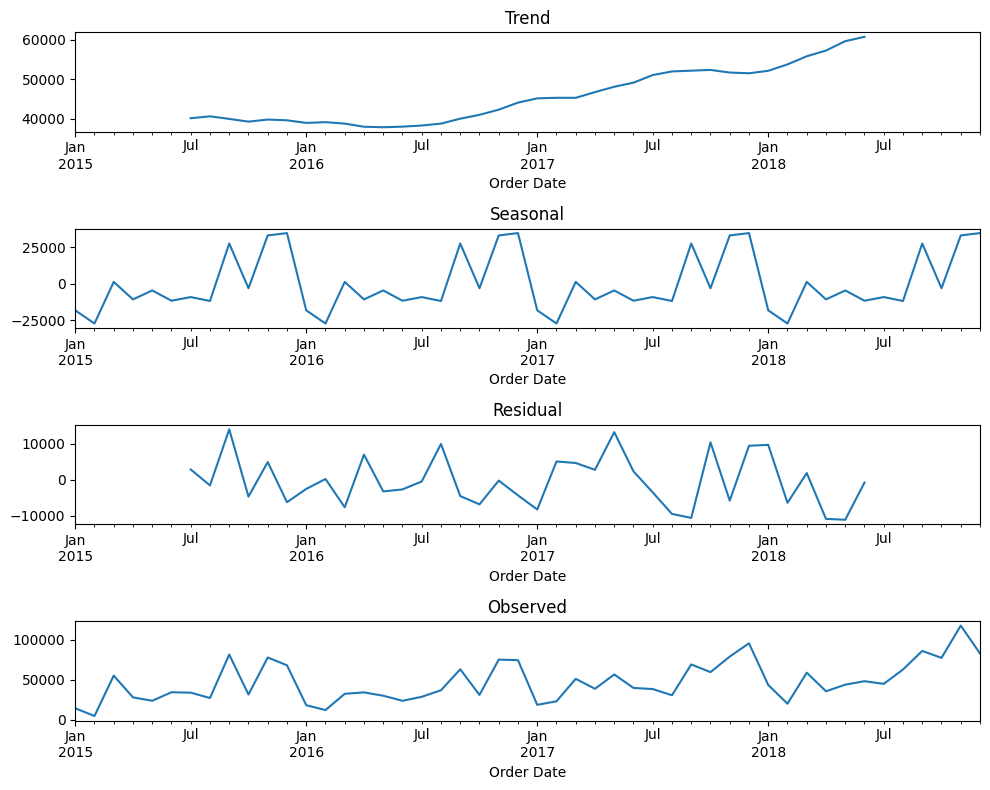

In [108]:

df_copy = df.copy()
df_copy.set_index('Order Date', inplace=True)
df_monthly = df_copy['Sales'].resample('M').sum()

decomposition_monthly = sm.tsa.seasonal_decompose(df_monthly, model='additive')

fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_monthly.trend.plot(ax=axes[0])
axes[0].set_title('Trend')
decomposition_monthly.seasonal.plot(ax=axes[1])
axes[1].set_title('Seasonal')
decomposition_monthly.resid.plot(ax=axes[2])
axes[2].set_title('Residual')
decomposition_monthly.observed.plot(ax=axes[3])
axes[3].set_title('Observed')

plt.tight_layout()
plt.show()

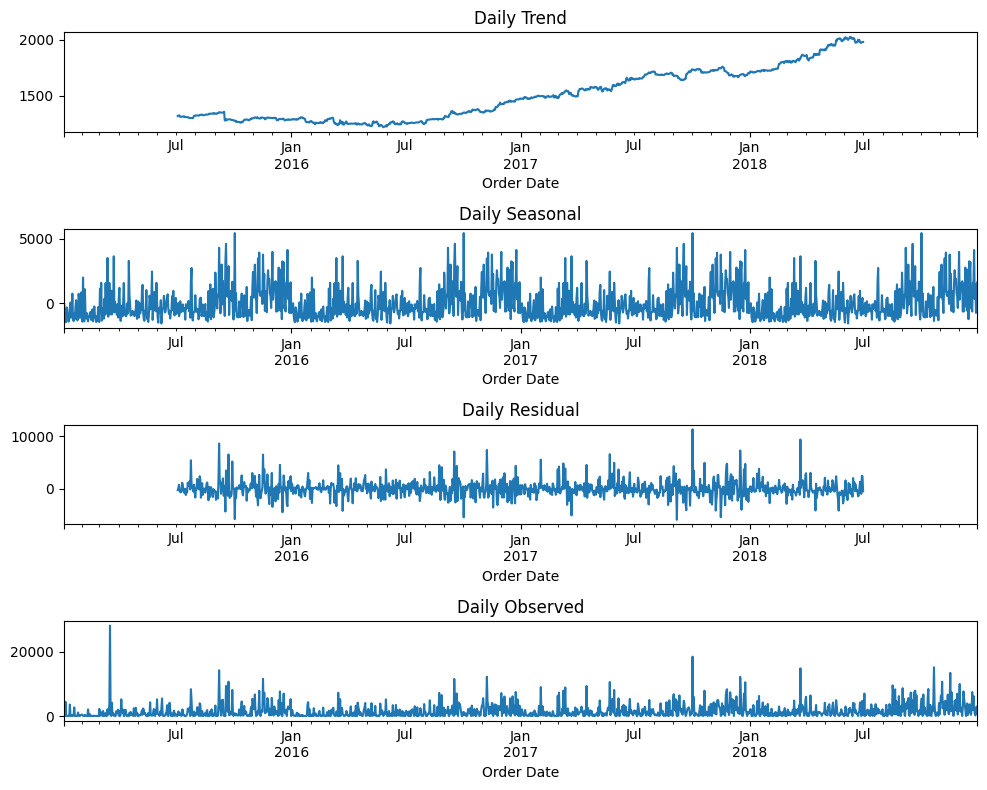

In [109]:
import statsmodels.api as sm

df_copy = df.copy()
df_copy.set_index('Order Date', inplace=True)
df_daily = df_copy['Sales'].resample('D').sum()
decomposition_daily = sm.tsa.seasonal_decompose(df_daily, model='additive',period=365)
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_daily.trend.plot(ax=axes[0])
axes[0].set_title('Daily Trend')
decomposition_daily.seasonal.plot(ax=axes[1])
axes[1].set_title('Daily Seasonal')
decomposition_daily.resid.plot(ax=axes[2])
axes[2].set_title('Daily Residual')
decomposition_daily.observed.plot(ax=axes[3])
axes[3].set_title('Daily Observed')

plt.tight_layout()
plt.show()

<h4>Random Walk</h4>

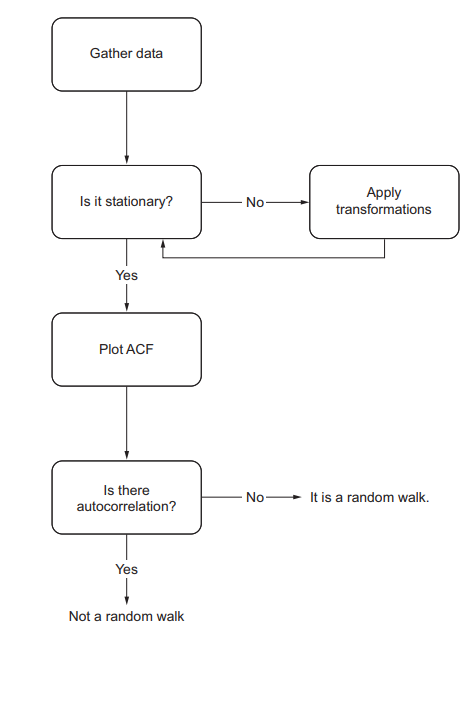

<h4>Kiểm định ADF</h4>

In [110]:
result = adfuller(df['Sales'])
p_value = result[1]
if p_value <= 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

Data is stationary


<h4>Biểu đồ ACF</h4>

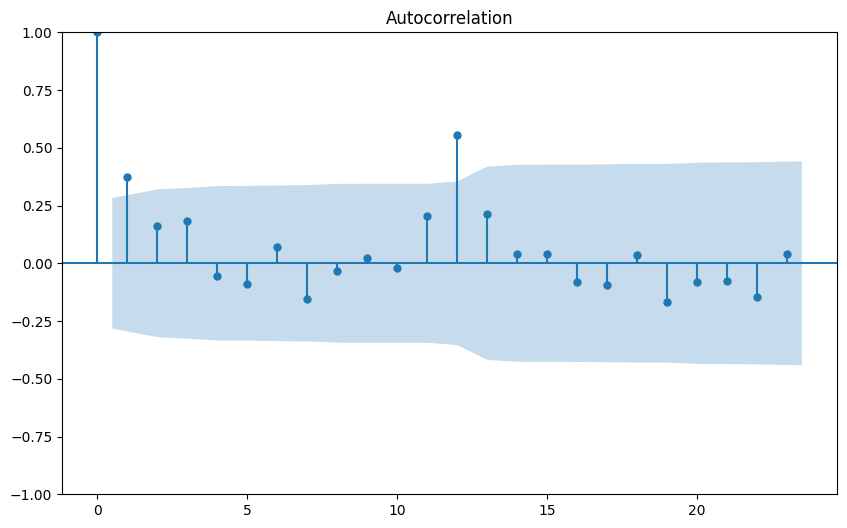

In [111]:
df_copy = df.copy()
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])
df_copy.set_index('Order Date', inplace=True)
df_monthly = df_copy['Sales'].resample('M').sum()

fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df_monthly, lags=23, ax=ax)
plt.show()

<h4>Vẽ biểu đồ PACF</h4>

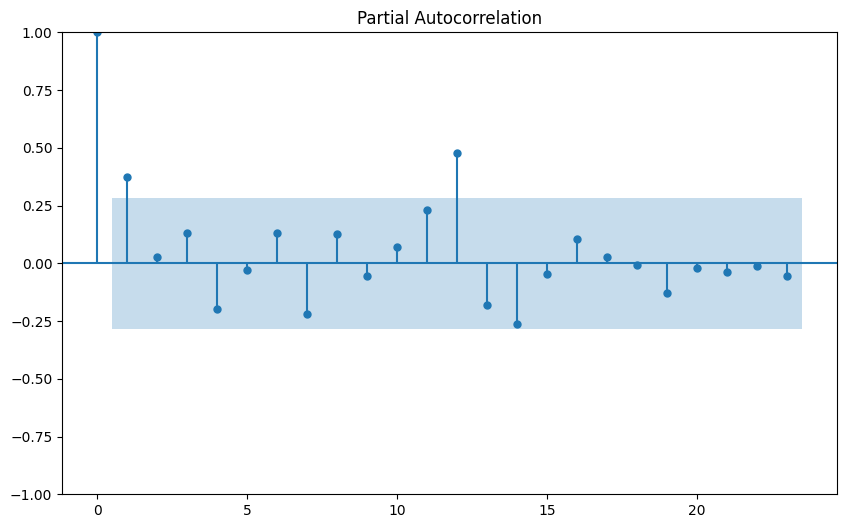

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df_monthly, lags=23, ax=ax)
plt.show()


In [113]:
from pmdarima import auto_arima

model_param = auto_arima(df_monthly, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.923, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.14 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.22 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=0.41 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.07 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=0.45 sec
 ARIMA(2,1,0)(1,0,1

In [114]:
train = df_monthly['2015':'2017']
test = df_monthly['2018']


In [115]:
order = (2, 1, 0)
seasonal_order = (1, 0, 0, 12)

# Xây dựng và huấn luyện mô hình trên tập huấn luyện
sarima_model = sm.tsa.SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Dự báo cho tập kiểm tra và tập dự báo
forecast_train = sarima_model_fit.predict(start=train.index[0], end=train.index[-1], dynamic=False)
forecast_test = sarima_model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=True)

# Tạo DataFrame cho việc visualize
train_df = pd.DataFrame({'Date': train.index, 'Sales': train.values, 'Type': 'Train'})
test_df = pd.DataFrame({'Date': test.index, 'Sales': test.values, 'Type': 'Test'})
forecast_test_df = pd.DataFrame({'Date': test.index, 'Sales': forecast_test.values, 'Type': 'Forecast (Test)'})

# Kết hợp dữ liệu
plot_df = pd.concat([train_df, test_df, forecast_test_df])

# Tạo biểu đồ với Plotly
fig = px.line(plot_df, x='Date', y='Sales', color='Type', title='SARIMA Model Forecast')

fig.update_traces(hovertemplate='Date: %{x}<br>Sales: %{y:,.2f}<extra></extra>')
fig.update_xaxes(tickangle=90)
fig.update_layout(
    xaxis_title='Order Date (Monthly)',
    yaxis_title='Sales',
    legend_title='Data Type'
)

fig.show()

In [116]:
train = df_monthly['2015':'2017']
test = df_monthly['2018']

# Initial SARIMA model parameters
order = (2, 1, 0)
seasonal_order = (1, 0, 0, 12)

# Grid search over a range of parameter values
best_aic = np.inf
best_order = None
best_seasonal_order = None

for p in range(3):  # p can be 0, 1, or 2
    for d in range(2):  # d can be 0 or 1
        for q in range(3):  # q can be 0, 1, or 2
            for P in range(2):  # P can be 0 or 1
                for D in range(2):  # D can be 0 or 1
                    for Q in range(2):  # Q can be 0 or 1
                        current_order = (p, d, q)
                        current_seasonal_order = (P, D, Q, 12)
                        
                        # Fit SARIMA model
                        sarima_model = sm.tsa.SARIMAX(train, order=current_order, seasonal_order=current_seasonal_order)
                        sarima_model_fit = sarima_model.fit()
                        
                        # Calculate AIC
                        current_aic = sarima_model_fit.aic
                        
                        # Update best parameters if AIC is lower
                        if current_aic < best_aic:
                            best_aic = current_aic
                            best_order = current_order
                            best_seasonal_order = current_seasonal_order

# Fit SARIMA model with best parameters
sarima_model = sm.tsa.SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_model_fit = sarima_model.fit()

# Forecast for test period
forecast_test = sarima_model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=True)

# Create DataFrame for visualization
test_df = pd.DataFrame({'Date': test.index, 'Sales': test.values, 'Type': 'Test'})
forecast_test_df = pd.DataFrame({'Date': test.index, 'Sales': forecast_test.values, 'Type': 'Forecast (Test)'})

# Combine data for plotting
plot_df = pd.concat([test_df, forecast_test_df])

# Create plot with Plotly
fig = px.line(plot_df, x='Date', y='Sales', color='Type', title='SARIMA Model Forecast')

# Update hover template and layout
fig.update_traces(hovertemplate='Date: %{x}<br>Sales: %{y:,.2f}<extra></extra>')
fig.update_xaxes(tickangle=90)
fig.update_layout(
    xaxis_title='Order Date (Monthly)',
    yaxis_title='Sales',
    legend_title='Data Type'
)

# Show plot
fig.show()